In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, ttest_ind, shapiro, kstest

import warnings
warnings.filterwarnings("ignore")

# **Latar Belakang**

Berikut adalah kamus kolom untuk mempermudah pemahaman data:

People:
* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise
Products:
* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

Promotion:
* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if the customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if the customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if the customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if the customer accepted the offer in the last campaign, 0 otherwise

Place:
* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalog
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to the company’s website in the last month

# **Pemahaman Data**

Data Mentah 

In [2]:
df = pd.read_csv('Supermarket_Customers.csv', sep = '\t')
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


# Unecessary Column Handling

Kolom 'Z_CostContact' dan 'Z_Revenue' didrop karena tidak mencerminkan apa-apa

In [3]:
df = df.drop(df[['Z_CostContact', 'Z_Revenue']], axis=1)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,5,10,3,0,0,0,0,0,0,0


# Tipe-tipe data dan missing value dalam kolom

In [4]:
display(df.info(),
df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

None

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

Temuan dari tipe dan missing value data:
* terdapat 24 NaN pada kolom 'Income'
* kolom 'Dt_Costumer' belum dalam format DateTime

Mengubah kolom 'Dt_Costumer' ke dalam format DateTime

In [5]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format="%d-%m-%Y")

# Inspeksi nilai-nilai unik

In [6]:
pd.set_option('display.max_colwidth', None)
# buat list kosong utk dataframe kolom baru
isitabel = []
# masukkan nunique dan unique kolom ke dalam dataframe
for col in df:
    isitabel.append([col, df[col].nunique(),df[col].unique()])
df_showU = pd.DataFrame(columns=['kolom', 'jumlah unique', 'nilai unique'], data=isitabel)
df_showU

,kolom,jumlah unique,nilai unique
0,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, ...]"
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,663,"[2012-09-04 00:00:00, 2014-03-08 00:00:00, 2013-08-21 00:00:00, 2014-02-10 00:00:00, 2014-01-19 00:00:00, 2013-09-09 00:00:00, 2012-11-13 00:00:00, 2013-05-08 00:00:00, 2013-06-06 00:00:00, 2014-03-13 00:00:00, 2013-11-15 00:00:00, 2012-10-10 00:00:00, 2012-11-24 00:00:00, 2012-12-24 00:00:00, 2012-08-31 00:00:00, 2013-03-28 00:00:00, 2012-11-03 00:00:00, 2012-08-08 00:00:00, 2013-01-06 00:00:00, 2012-12-23 00:00:00, 2014-01-11 00:00:00, 2013-03-18 00:00:00, 2013-01-02 00:00:00, 2013-05-27 00:00:00, 2013-02-20 00:00:00, 2013-05-31 00:00:00, 2013-11-22 00:00:00, 2014-05-22 00:00:00, 2013-05-11 00:00:00, 2012-10-29 00:00:00, 2013-08-29 00:00:00, 2013-12-31 00:00:00, 2013-09-02 00:00:00, 2014-02-11 00:00:00, 2013-02-01 00:00:00, 2013-04-29 00:00:00, 2013-03-12 00:00:00, 2013-11-05 00:00:00, 2013-10-02 00:00:00, 2014-06-28 00:00:00, 2012-11-09 00:00:00, 2013-05-24 00:00:00, 2014-01-01 00:00:00, 2012-11-08 00:00:00, 2014-05-12 00:00:00, 2012-08-11 00:00:00, 2014-06-07 00:00:00, 2013-06-12 00:00:00, 2012-11-19 00:00:00, 2013-04-02 00:00:00, 2014-04-28 00:00:00, 2013-06-17 00:00:00, 2014-03-03 00:00:00, 2013-07-04 00:00:00, 2012-09-07 00:00:00, 2013-02-18 00:00:00, 2013-06-11 00:00:00, 2013-12-06 00:00:00, 2013-05-21 00:00:00, 2014-05-11 00:00:00, 2014-03-19 00:00:00, 2013-09-27 00:00:00, 2013-04-08 00:00:00, 2012-09-11 00:00:00, 2012-09-14 00:00:00, 2013-03-17 00:00:00, 2013-04-05 00:00:00, 2014-04-30 00:00:00, 2012-12-19 00:00:00, 2012-08-27 00:00:00, 2012-10-12 00:00:00, 2013-09-04 00:00:00, 2012-08-29 00:00:00, 2013-06-23 00:00:00, 2013-07-03 00:00:00, 2014-02-25 00:00:00, 2013-08-11 00:00:00, 2013-07-16 00:00:00, 2014-05-28 00:00:00, 2014-01-21 00:00:00, 2014-05-27 00:00:00, 2013-11-23 00:00:00, 2014-03-23 00:00:00, 2014-05-24 00:00:00, 2012-11-22 00:00:00, 2013-04-11 00:00:00, 2013-12-01 00:00:00, 2013-06-20 00:00:

Temuan: 
* Marital Status sifatnya kategorikal
* Kolom produk perlu direname agar memudahkan pekerjaan

In [7]:
df = df.rename(columns={'MntWines': 'Wines',
                        'MntFruits': 'Fruits',
                        'MntMeatProducts': 'Meat',
                        'MntFishProducts': 'Fish',
                        'MntSweetProducts': 'Sweet',
                        'MntGoldProds': 'Gold'})

In [8]:
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

Perlu dibuat kolom baru yang menjelaskan value-value pada kolom 'Marital_Status' untuk mempermudah proses analisis di depan. Value tersebut dapat kita sebut sebagai pembeli. Berapa orang yang melakukan pembelian. 'Single', 'Yolo', 'Absurd', 'Divorced', 'Widow', dan 'Alone' dikelompokkan jadi satu  sebab value-value tersebut (diasumsikan) merepresentasikan satu orang. Dengan asumsi, value 'together' dan 'married' merepresentasikan dua orang (satu orang satu pasangan).

In [9]:
def UbahValMarit(x):
    if x=='Together' or x=='Married':
        return 2
    else:
        return 1

df['Buyer'] = df['Marital_Status'].apply(UbahValMarit)

# **Data Cleaning**

penanganan terhadap missing value

In [10]:
df[df['Income'].isna()]['Education'].value_counts()

Education
Graduation    11
PhD            5
Master         5
2n Cycle       3
Name: count, dtype: int64

^ Dari sini terlihat missing value terdapat pada pelanggan dengan edukasi: Graduation, PhD, Master, 2n Cycle

Dari jenis data dengan income sebagai missing value, diputuskan untuk mengisi nilai tersebut dengan pendekatan Median daripada menghapus keseluruhan baris. Meskipun missing value hanya 24 dari total 2240 data dan tidak akan jadi masalah untuk menghapus data-data (demi kemudahan), tapi kita memiliki cukup informasi sehingga dapat mengisi data tersebut dengan 'benar'.

Mengisi data income yang kosong dengan rata-rata gaji tingkat edukasi data bersangkutan:

* mengecek outlier dari gaji per tiap tingkat pendidikan

<Axes: xlabel='Income'>

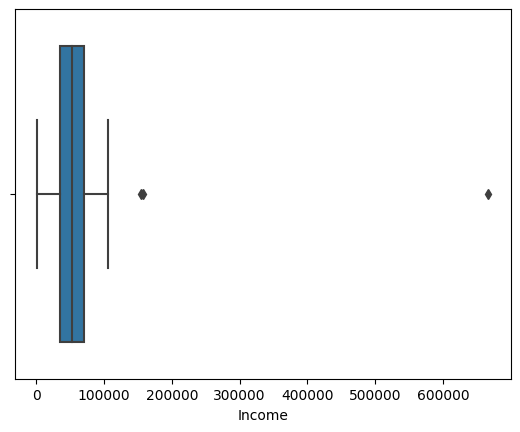

In [11]:
sns.boxplot(data=df[df['Education']=='Graduation'], x='Income')

In [12]:
df[df['Education']=='Graduation']['Income'].max()

666666.0

ditemukan outlier pada pendapatan pelanggan dengan tingkat edukasi Graduation. outlier ini harus dikesampingkan terlebih dahulu sebelum menghitung rata-ratanya. Sementara untuk yang paling ujung, sebesar 666666 perlu diganti dengan mean/median karena angkanya kurang terlalu jauh. Diasumsikan terdapat kemungkinan kesalahan dalam pengisian data.

In [13]:
a = df[(df['Education']=='Graduation') & (df['Income']<= 100000)]['Income'].median()

In [14]:
lokasimax = df['Income'] == df['Income'].max()
df.loc[lokasimax, 'Income'] = a
df = df.reset_index(drop=True)

<Axes: xlabel='Income'>

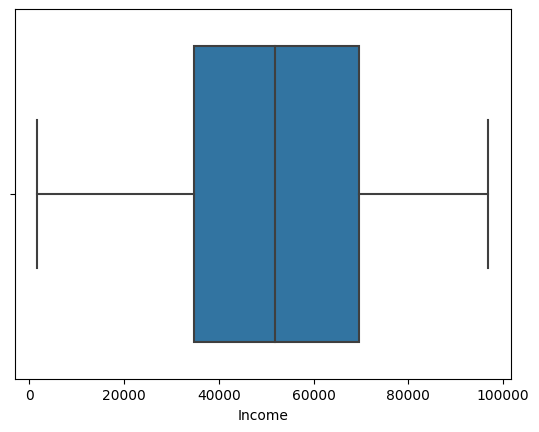

In [15]:
sns.boxplot(data=df[(df['Education']=='Graduation') & (df['Income']<= 100000)], x='Income')

di atas adalah visualisasi pendapatan pelanggan dengan tingkat edukasi graduation tanpa outlier

<Axes: xlabel='Income'>

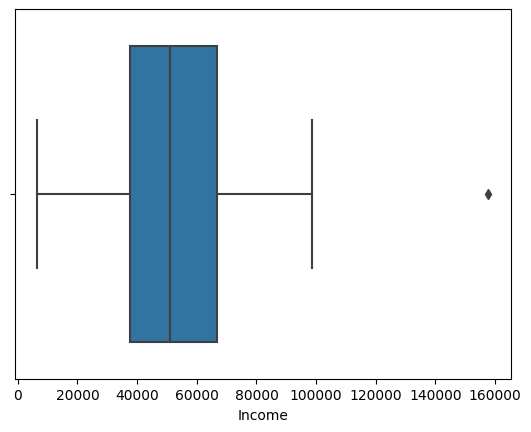

In [16]:
sns.boxplot(data=df[(df['Education']=='Master')], x='Income')

ditemukan outlier pada pendapatan pelanggan dengan tingkat edukasi Master. outlier ini harus dihilangkan sementara terlebih dahulu sebelum menghitung rata-ratanya.

<Axes: xlabel='Income'>

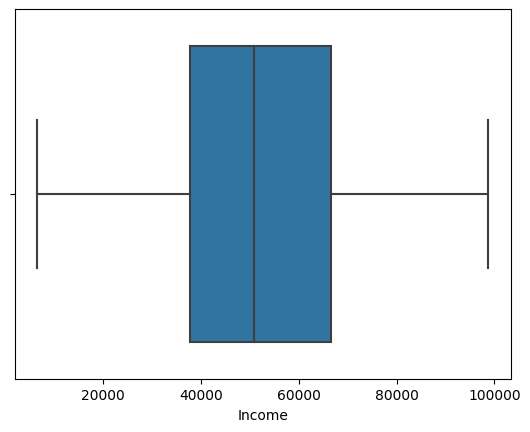

In [17]:
sns.boxplot(data=df[(df['Education']=='Master') & (df['Income']<= 100000)], x='Income')

di atas adalah visualisasi pendapatan pelanggan dengan tingkat edukasi graduation tanpa outlier

<Axes: xlabel='Income'>

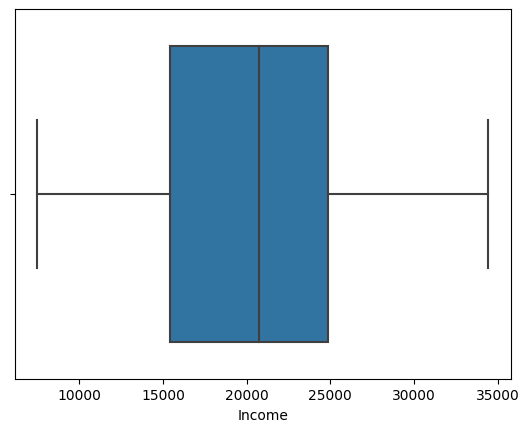

In [18]:
sns.boxplot(data=df[df['Education']=='Basic'], x='Income')

^ Tidak ada outlier pada data gaji costumer dengan tingkat pendidikan 'basic'

<Axes: xlabel='Income'>

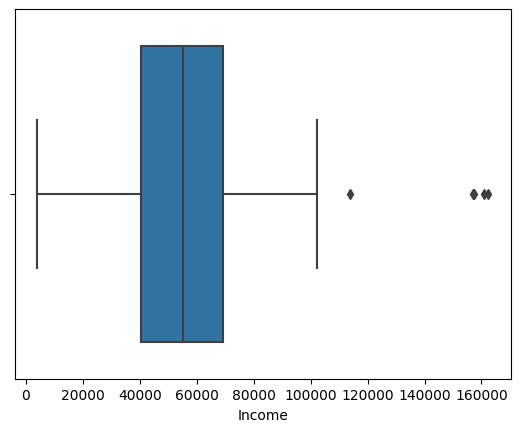

In [19]:
sns.boxplot(data=df[df['Education']=='PhD'], x='Income')

ditemukan beberapa outlier pada pendapatan pelanggan dengan tingkat edukasi PhD. outlier ini harus dihilangkan sementara terlebih dahulu sebelum menghitung rata-ratanya.

<Axes: xlabel='Income'>

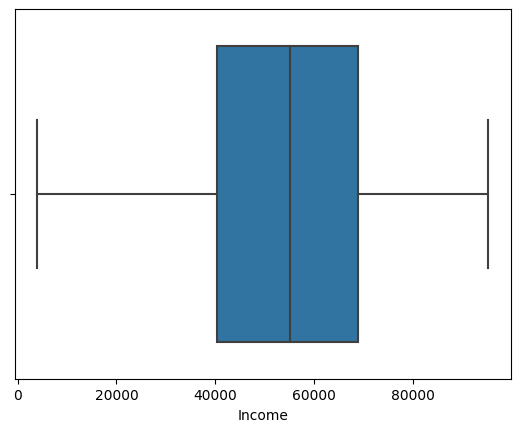

In [20]:
sns.boxplot(data=df[(df['Education']=='PhD') & (df['Income']<=100000)], x='Income')

<Axes: xlabel='Income'>

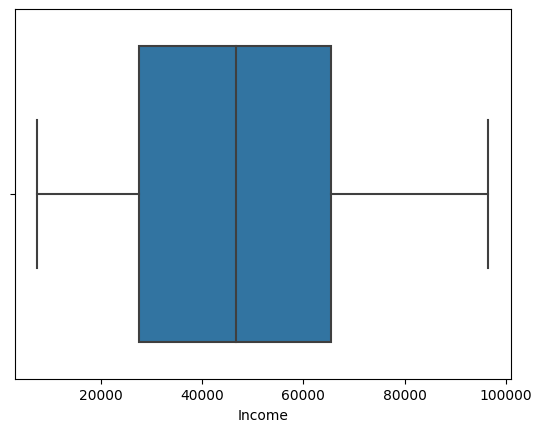

In [21]:
sns.boxplot(data=df[df['Education']=='2n Cycle'], x='Income')

^ Tidak Terdapat Outliers pada pendapatan pelanggan dengan tingkat pendidikan 2n Cycle

Dilakukan uji normalitas untuk menentukan penggunaan Mean/Median:

In [22]:
TwoNNorm, TwoNVal = shapiro(df[df['Education']=='2n Cycle']['Income'])
GradNorm, GradVal = shapiro(df[(df['Education']=='Graduation') & (df['Income']<= 100000)]['Income'])
MasNorm, MasVal = shapiro(df[(df['Education']=='Master') & (df['Income']<= 100000)]['Income'])
PhDNorm, PhDVal = shapiro(df[(df['Education']=='PhD') & (df['Income']<=100000)]['Income'])


print(f'''nilai P-Value dari uji normalitas untuk tiap tingkat edukasi: 
      - 2n Cycle: {TwoNVal}
      - Graduation: {GradVal}
      - Master: {MasVal}
      - PhDVal: {PhDVal}''')

nilai P-Value dari uji normalitas untuk tiap tingkat edukasi: 
      - 2n Cycle: 1.0
      - Graduation: 3.202295633525365e-12
      - Master: 0.0032785343937575817
      - PhDVal: 0.00027480314020067453


In [23]:
GraduationMed = df[(df['Education']=='Graduation') & (df['Income']<= 100000)]['Income'].median()
MasterMed = df[(df['Education']=='Master') & (df['Income']<= 100000)]['Income'].median()
TwoNMean = df[df['Education']=='2n Cycle']['Income'].mean()
PhDMed = df[(df['Education']=='PhD') & (df['Income']<=100000)]['Income'].median()

In [24]:
df.loc[df['Education']=='Graduation', 'Income'] = df.loc[df['Education']=='Graduation', 'Income'].fillna(GraduationMed)
df.loc[df['Education']=='Master', 'Income'] = df.loc[df['Education']=='Master', 'Income'].fillna(MasterMed)
df.loc[df['Education']=='2n Cycle', 'Income'] = df.loc[df['Education']=='2n Cycle', 'Income'].fillna(TwoNMean)
df.loc[df['Education']=='PhD', 'Income'] = df.loc[df['Education']=='PhD', 'Income'].fillna(PhDMed)

In [25]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
Wines                  0
Fruits                 0
Meat                   0
Fish                   0
Sweet                  0
Gold                   0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
Buyer                  0
dtype: int64

^ Data telah bersih dari Missing Values

# Penambahan Kolom Total Pembelian, Frekuensi Pembelian, dan Umur Pelanggan

Untuk mempermudah analisa, sebaiknya ditambahkan kolom pembelian total dan umur pelanggan.

sebelum dapat menentukan umur pelanggan, kita harus tahu tanggal terakhir dari data. diambil dari dt consumer.

In [26]:
df['Dt_Customer'].max()

Timestamp('2014-06-29 00:00:00')

karena tahun terakhir adalah pertengahan tahun 2014, maka dibulatkan ke 2015 untuk mempermudah penghitungan

In [27]:
df['Cust_Age'] = 2015 - df['Year_Birth']

Kolom pembelian total adalah akumulasi dari pembelian barang-barang yang ada

In [28]:
df['TotalBought'] = df['Wines'] + df['Fruits'] + df['Meat'] + df['Fish'] + df['Sweet'] + df['Gold']

In [29]:
display(df.columns)
display(df.info())

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweet', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Buyer', 'Cust_Age',
       'TotalBought'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   Wines                2240 non-null   int64         
 10  Fruits               2240 non-null   int64         
 11  Meat                 2240 non-null   int64         
 12  Fish                 2240 non-null   int64         
 13  Sweet                2240 non-nul

None

# Data siap digunakan

Dataset yang telah bersih diekspor dalam bentuk csv untuk dikerjakan di file berbeda

In [30]:
df.to_csv('dt_clean.csv', index=False)